# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Darren Christian Liharja]
- **Email:** [darrenliharja@gmail.com]
- **ID Dicoding:** [darrencl17]

## Penjelasan Data
Data tampaknya berasal dari sistem pemantauan kualitas udara yang mencatat berbagai parameter lingkungan, khususnya di sebuah stasiun pemantauan yang mungkin terletak pada kota besar di Tiongkok yang memiliki sistem pemantauan kualitas udara canggih.

## Penjelasan Kolom
Sebelum membuat pertanyaan bisnis ada baiknya kita memahami dulu dataset yang diberikan. Berikut adalah kolom-kolom yang ada pada dataset dengan penjelasan yang dicari dari google antara lain
- year: Tahun saat data dikumpulkan.
- month: Bulan saat data dikumpulkan.
- day: Hari dalam bulan saat data dikumpulkan.
- hour: Jam dalam sehari (0-23) saat data dikumpulkan.
- PM2.5: Konsentrasi partikel udara dengan diameter kurang dari 2.5 mikrometer (diukur dalam mikrogram per meter kubik, µg/m³). PM2.5 dianggap berbahaya bagi kesehatan karena partikel ini dapat masuk jauh ke dalam paru-paru.
- PM10: Konsentrasi partikel udara dengan diameter kurang dari 10 mikrometer (juga diukur dalam µg/m³). PM10 lebih kasar dari PM2.5 tetapi tetap bisa berdampak pada kesehatan pernapasan.
- SO2: Konsentrasi sulfur dioksida di udara (diukur dalam mikrogram per meter kubik, µg/m³). SO2 adalah gas yang dapat menyebabkan masalah pernapasan dan berkontribusi pada hujan asam.
- NO2: Konsentrasi nitrogen dioksida di udara (diukur dalam µg/m³). NO2 adalah polutan utama yang berasal dari emisi kendaraan dan aktivitas industri yang dapat mengiritasi sistem pernapasan.
- CO: Konsentrasi karbon monoksida di udara (diukur dalam miligram per meter kubik, mg/m³). CO adalah gas beracun yang dihasilkan oleh pembakaran bahan bakar fosil yang tidak sempurna.
- O3: Konsentrasi ozon di udara (diukur dalam µg/m³). Ozon di permukaan tanah dapat menyebabkan masalah pernapasan dan merupakan komponen utama kabut asap.
- TEMP: Suhu udara sekitar (diukur dalam derajat Celsius, °C).
- PRES: Tekanan atmosfer (diukur dalam hektopascal, hPa).
- DEWP: Suhu titik embun (diukur dalam °C), yang menunjukkan suhu di mana udara menjadi jenuh dengan uap air dan embun terbentuk.
- RAIN: Jumlah curah hujan (kemungkinan diukur dalam milimeter, mm) selama periode waktu tertentu, biasanya per jam.
- wd: Arah angin, biasanya direpresentasikan sebagai arah mata angin (misalnya N, NE, E, dll.).
- WSPM: Kecepatan angin (kemungkinan diukur dalam meter per detik, m/s).
- station: Stasiun atau lokasi spesifik tempat data dikumpulkan. Ini bisa berupa kota, situs pemantauan tertentu, atau stasiun cuaca.

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca (seperti suhu, tekanan atmosfer, dan kecepatan angin) terhadap tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3)?
- Apakah ada pola musiman dalam tingkat polusi udara yang dapat digunakan untuk memprediksi waktu dengan kualitas udara buruk, sehingga dapat diambil langkah pencegahan?

## Import Semua Packages/Library yang Digunakan

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

## Data Wrangling

### Gathering Data
Memuat data yang berada dari zip, maka dari itu saya menggunakan salah satu library python yang bernama zipfile

In [209]:
with ZipFile('Air-quality-dataset.zip', 'r') as zipObj:
  zipObj.extractall('data')

Membuat dataframe yang menyatukan semua csv agar lebih mudah mengolah data

In [210]:
dataframes = []
folder_path = 'data/PRSA_Data_20130301-20170228/'
files = os.listdir(folder_path)

for filename in files:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)  # Membaca file csv
    dataframes.append(df)  # Menambahkan DataFrame ke list

combined_df = pd.concat(dataframes, ignore_index=True)

In [211]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Dataset berisi berbagai jenis data, termasuk data diskrit dan kontinu. Sebagai contoh, kolom seperti "year", "month", "day", dan "hour" adalah data diskrit, sedangkan kolom seperti "PM2.5", "TEMP", dan "PRES" adalah data kontinu.
- Dari combined_head() terlihat beberapa baris dengan kolom Nan yang berarti harus dilakukan pengecekan lebih mendalam mengenai berapa banyak baris dengan kolom Nan dan bagaimana solusi untuk mengatasinya
- Kolom No dapat dibuang karena tidak diperlukan (sudah ada nomor dari dataframes)

### Assessing Data
Lalu akan melakukan beberapa pengecekan data lebih awal seperti berapa banyak data yang ada di dataframe, berapa banyak data yang bernilai null, dan deskripsi data

In [212]:
combined_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
420764,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
420765,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
420766,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [213]:
combined_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [214]:
combined_df.duplicated().sum()

0

In [215]:
# Daftar kolom yang ingin diinterpolasi
cols_to_interpolate = ['TEMP', 'PRES', 'DEWP', 'wd', 'WSPM']

# Memastikan tipe data kolom adalah numerik
for col in cols_to_interpolate:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Menghitung kuartil
Q1 = combined_df[cols_to_interpolate].quantile(0.25)
Q3 = combined_df[cols_to_interpolate].quantile(0.75)
IQR = Q3 - Q1

# Mendeteksi outlier
outlier_mask_iqr = ((combined_df[cols_to_interpolate] < (Q1 - 1.5 * IQR)) |
                     (combined_df[cols_to_interpolate] > (Q3 + 1.5 * IQR)))

# Menghitung jumlah outlier per kolom
outlier_counts = outlier_mask_iqr.sum()

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom (IQR):")
print(outlier_counts)

# Menampilkan total jumlah outlier
total_outliers = outlier_counts.sum()  # Total jumlah outlier
print("\nTotal jumlah outlier (IQR):", total_outliers)  # Total jumlah outlier


Jumlah outlier per kolom (IQR):
TEMP        0
PRES        0
DEWP        0
wd          0
WSPM    23079
dtype: int64

Total jumlah outlier (IQR): 23079


**Insight:**
- Terdapat 470 ribu data
- terdapat banyak kolom yang memiliki data null, terutama data yang berhubungan dengan tingkat polusi
- terdapat 2 buah kolom dengan tingkat outlier yang banyak yaitu RAIN dan WSPM

### Cleaning Data
Berikutnya adalah tahap cleaning data, dari data yang didapat terdapat beberapa modifikasi untuk membuat data lebih bersih

In [216]:
# Menghapus kolom 'No' dan 'station' dari DataFrame karena tidak akan berpengaruh terhadap hasil perhitungan diakhir
combined_df = combined_df.drop(columns=['No'])
combined_df = combined_df.drop(columns=['station'])

# Memastikan kolom sudah dihapus
print(combined_df.head())

   year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9  1025.8   
1  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1  1026.1   
2  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7  1026.2   
3  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1  1027.3   
4  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4  1027.7   

   DEWP  RAIN  wd  WSPM  
0 -20.5   0.0 NaN   9.3  
1 -21.3   0.0 NaN   9.4  
2 -23.0   0.0 NaN   8.6  
3 -23.3   0.0 NaN   6.6  
4 -22.9   0.0 NaN   4.5  


Untuk pembersihan data dari kolom null, saya menggabungkan ketiga metode untuk mengatasi missing value, yaitu imputasi untuk kolom-kolom yang missing values lumayan banyak (masih dibawah 10.000 missing values) sehingga data tersebut masih dapat digunakan.

Sedangkan untuk data-data dengan sifat time series, saya akan menggunakan interpolate linear (rata-rata masih sangat kecil untuk missing valuesnya dibawah 1.000), dan untuk kolom-kolom yang memiliki nilai Nan sangat banyak saya akan drop saja, karena takutnya jika menggunakan metode imputasi atau interpolasi dapat mempengaruhi hasil akhir

In [217]:
# Imputasi untuk kolom numerik
combined_df['PM2.5'].fillna(combined_df['PM2.5'].mean(), inplace=True)
combined_df['PM10'].fillna(combined_df['PM10'].mean(), inplace=True)
combined_df['SO2'].fillna(combined_df['SO2'].median(), inplace=True)
combined_df['wd'].fillna(combined_df['SO2'].median(), inplace=True)

## Imputasi untuk kolom rain menggunakan mode dikarenakan banyak data yang menunjukkan bahwa tidak ada hujan
combined_df['RAIN'].fillna(combined_df['RAIN'].mode()[0], inplace=True)

In [218]:
# Drop baris dengan terlalu banyak nilai yang hilang
combined_df.dropna(subset=['NO2', 'CO', 'O3'], inplace=True)

In [219]:
# Daftar kolom yang ingin diinterpolasi
cols_to_interpolate = ['TEMP', 'PRES', 'DEWP', 'WSPM']

# Melakukan interpolasi hanya pada kolom yang ditentukan
combined_df[cols_to_interpolate] = combined_df[cols_to_interpolate].interpolate(method='linear')

In [220]:
#pengecekan akhir
combined_df.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [221]:
# Menghapus outlier berdasarkan IQR
for col in cols_to_interpolate:
    # Mendapatkan batas bawah dan batas atas
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]

    # Menghapus baris yang mengandung outlier
    combined_df = combined_df[(combined_df[col] >= lower_bound) & (combined_df[col] <= upper_bound)]

#untuk mengecek seberapa banyak data yang tersisa setelah melakukan cleaning
combined_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
5,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,7.0,1.7
6,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,7.0,1.6
7,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,7.0,1.7
8,2013,3,1,8,8.0,8.0,3.0,19.0,400.0,66.0,-1.0,1031.2,-21.8,0.0,7.0,2.7
9,2013,3,1,9,3.0,6.0,3.0,21.0,400.0,60.0,0.0,1031.3,-22.9,0.0,7.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420759,2017,2,28,15,13.0,29.0,6.0,21.0,400.0,70.0,15.6,1007.6,-12.8,0.0,7.0,3.2
420764,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,7.0,2.1
420765,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,7.0,1.5
420766,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,7.0,1.4


**Insight:**
- Setelah melakukan data cleaning, tersisa sekitar 350.000 baris data
- data yang sudah bersih dapat digunakan untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Analisis Persebaran Data
Sebelum memulai kita ingin mengetahui mengenai data-data menggunakan .describe()


In [222]:
combined_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.000000,367587.0,367587.000000
mean,2014.709949,6.522241,15.755734,11.478303,82.531248,106.332738,15.997182,52.336684,1274.910443,56.210364,13.710424,1010.617821,3.205421,0.062388,7.0,1.529643
std,1.157547,3.414975,8.802777,7.006248,80.767125,90.700135,21.671888,35.013470,1171.136094,57.356725,11.426434,10.401998,13.526504,0.783028,0.0,0.902555
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,7.0,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,23.000000,38.000000,3.000000,25.000000,500.000000,9.000000,3.300000,1002.200000,-8.000000,0.000000,7.0,0.900000
50%,2015.000000,7.000000,16.000000,11.000000,59.000000,85.000000,7.000000,45.000000,900.000000,42.000000,14.800000,1010.100000,4.200000,0.000000,7.0,1.300000
75%,2016.000000,9.000000,23.000000,18.000000,114.000000,147.000000,20.000000,73.000000,1600.000000,81.000000,23.400000,1018.900000,15.500000,0.000000,7.0,2.000000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,7.0,4.100000


Persebaran untuk data secara keseluruhan menggunakan plot histogram

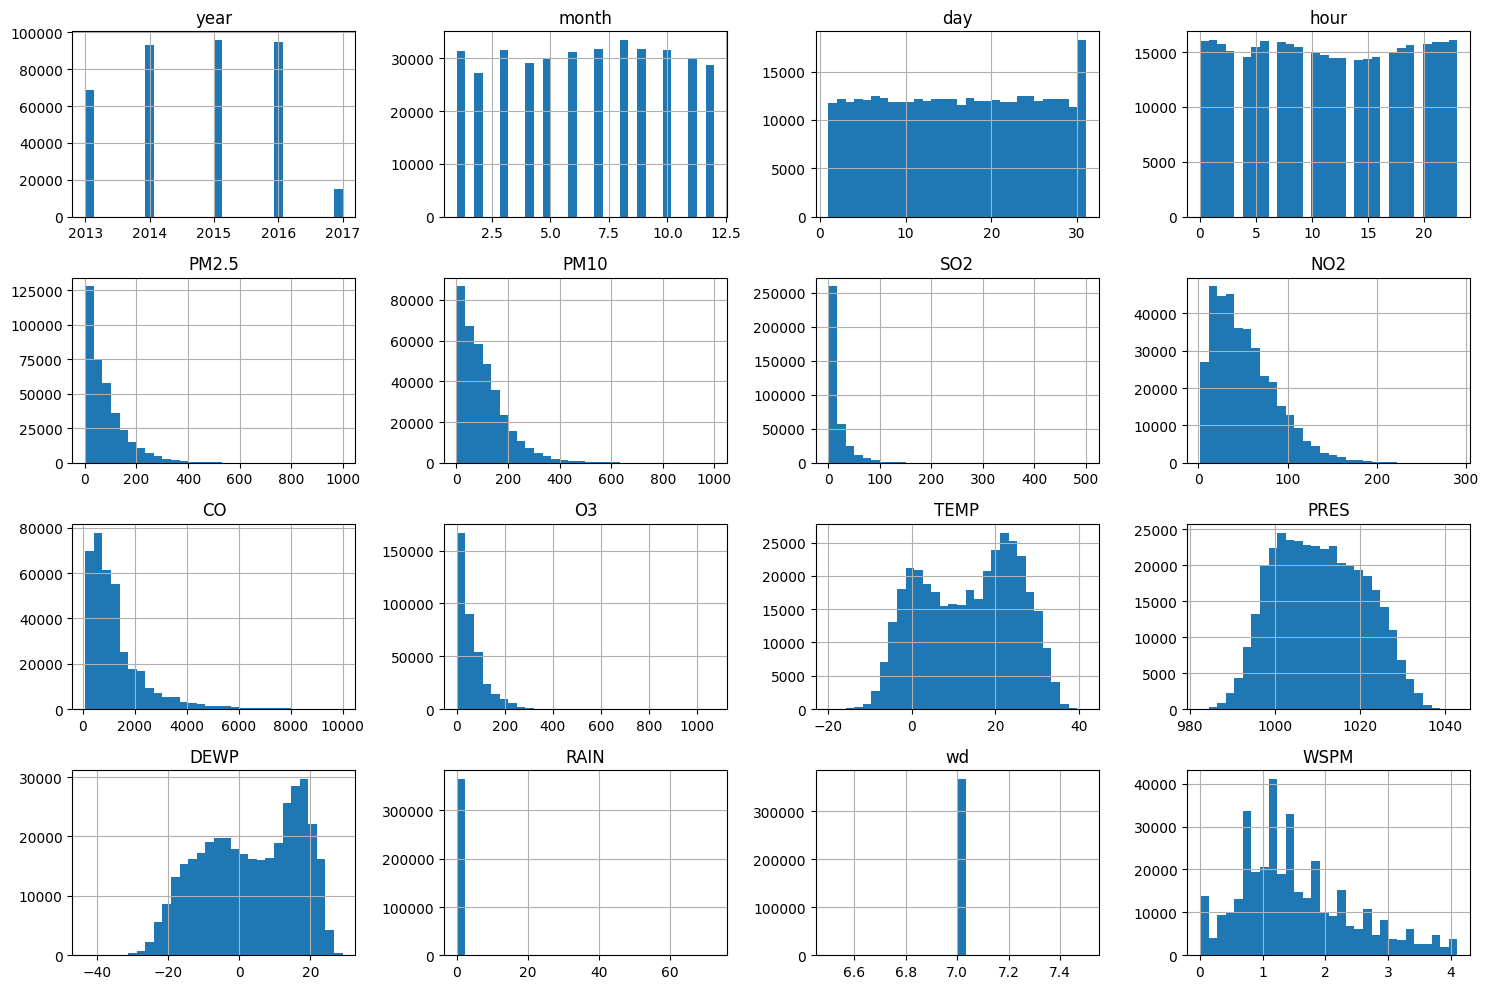

In [223]:
combined_df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Analisis Korelasi Data
Kita juga dapat melakukan korelasi data secara menyeluruh terlebih dahulu untuk melihat apakah ada korelasi yang menarik antara beberapa pasang variabel

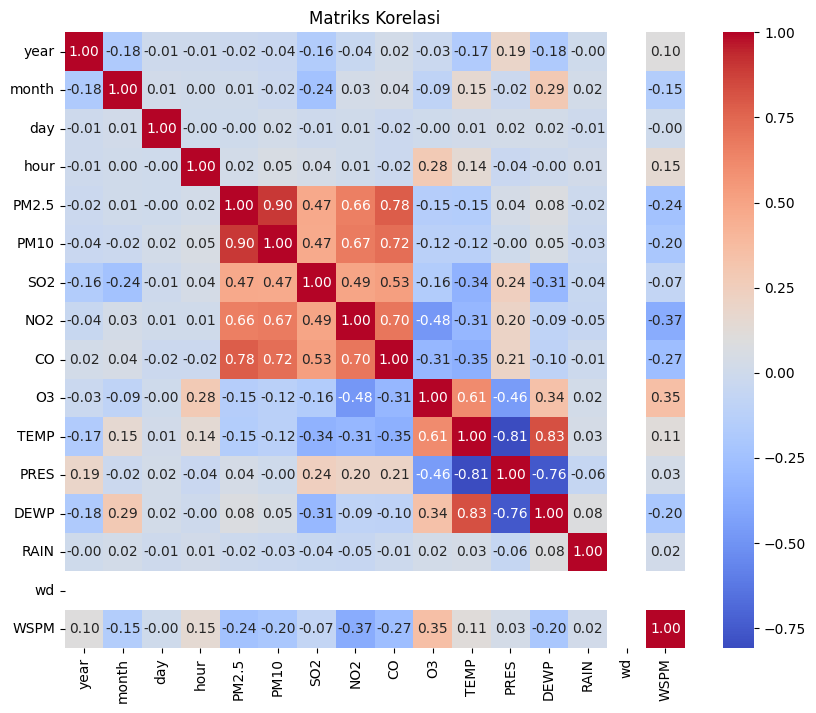

In [224]:
numerical_cols = combined_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

Setelah mengetahui bahwa terdapat data-data yang memiliki korelasi seperti antara jumlah partikel diudara dengan temperatur kita dapat mencari tahu juga mengenai peningkatan polusi dari tahun ke tahun

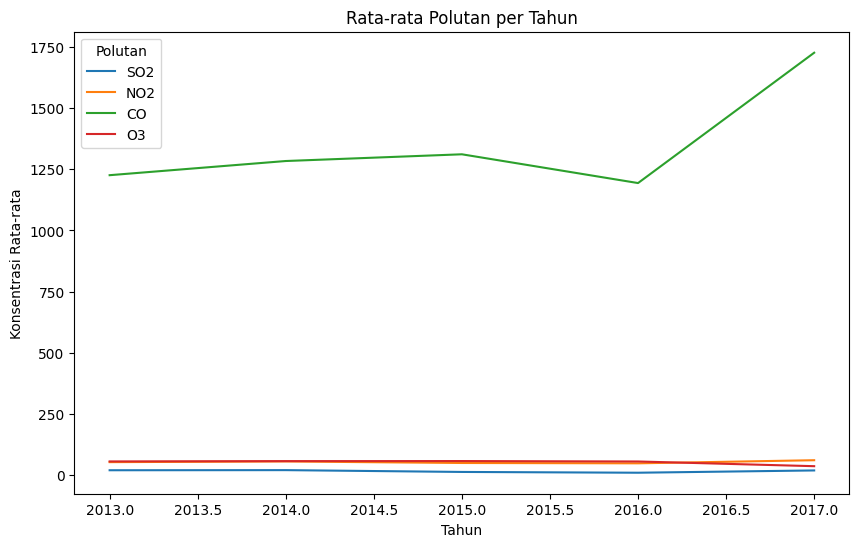

In [225]:
combined_df.groupby('year')[['SO2', 'NO2', 'CO', 'O3']].mean().plot(kind='line', figsize=(10, 6))
plt.title('Rata-rata Polutan per Tahun')
plt.ylabel('Konsentrasi Rata-rata')
plt.xlabel('Tahun')
plt.legend(title='Polutan')
plt.show()

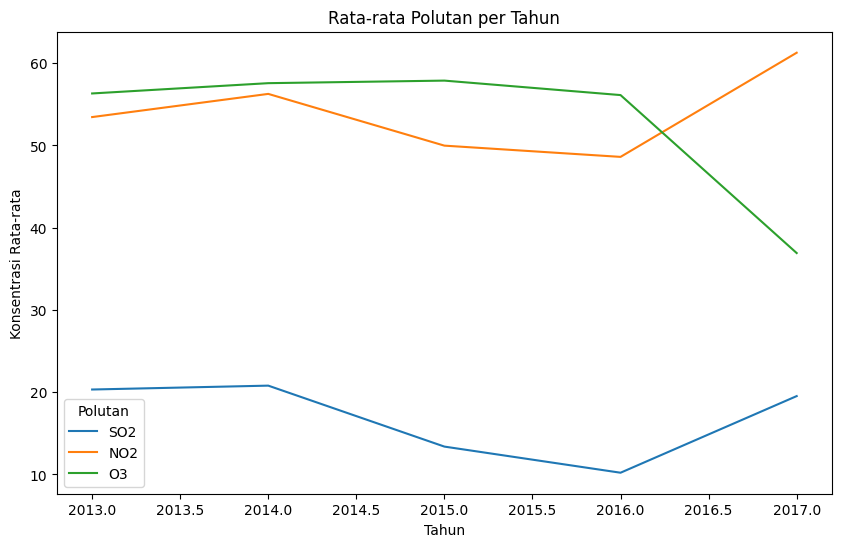

In [226]:
combined_df.groupby('year')[['SO2', 'NO2', 'O3']].mean().plot(kind='line', figsize=(10, 6))
plt.title('Rata-rata Polutan per Tahun')
plt.ylabel('Konsentrasi Rata-rata')
plt.xlabel('Tahun')
plt.legend(title='Polutan')
plt.show()

**Insight:**
- Dari data persebaran menggunakan histogram terdapat 2 data yang memiliki anomali yaitu RAIN atau curah hujan, hal ini dikarenakan karena sedikitnya hujan yang terjadi dan juga wd atau wind direction yang semuanya bernilai 7 maka dari itu kedua data ini tidak akan digunakan untuk menjawab pertanyaan yang saya berikan diatas
- Dari matrix correlation dapat terlihat bahwa untuk data yang berhubungan dengan banyaknya polutan diudara seperti PM2.5 dan PM10 akan sangat terpengaruhi oleh jumlah banyaknya polusi diudara yang contohnya adalah kolom 'SO2', 'NO2', 'CO', 'O3'
- Dari line chart dapat dilihat banyak polusi berasal dari 'CO'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca (seperti suhu, tekanan atmosfer, dan kecepatan angin) terhadap tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3)

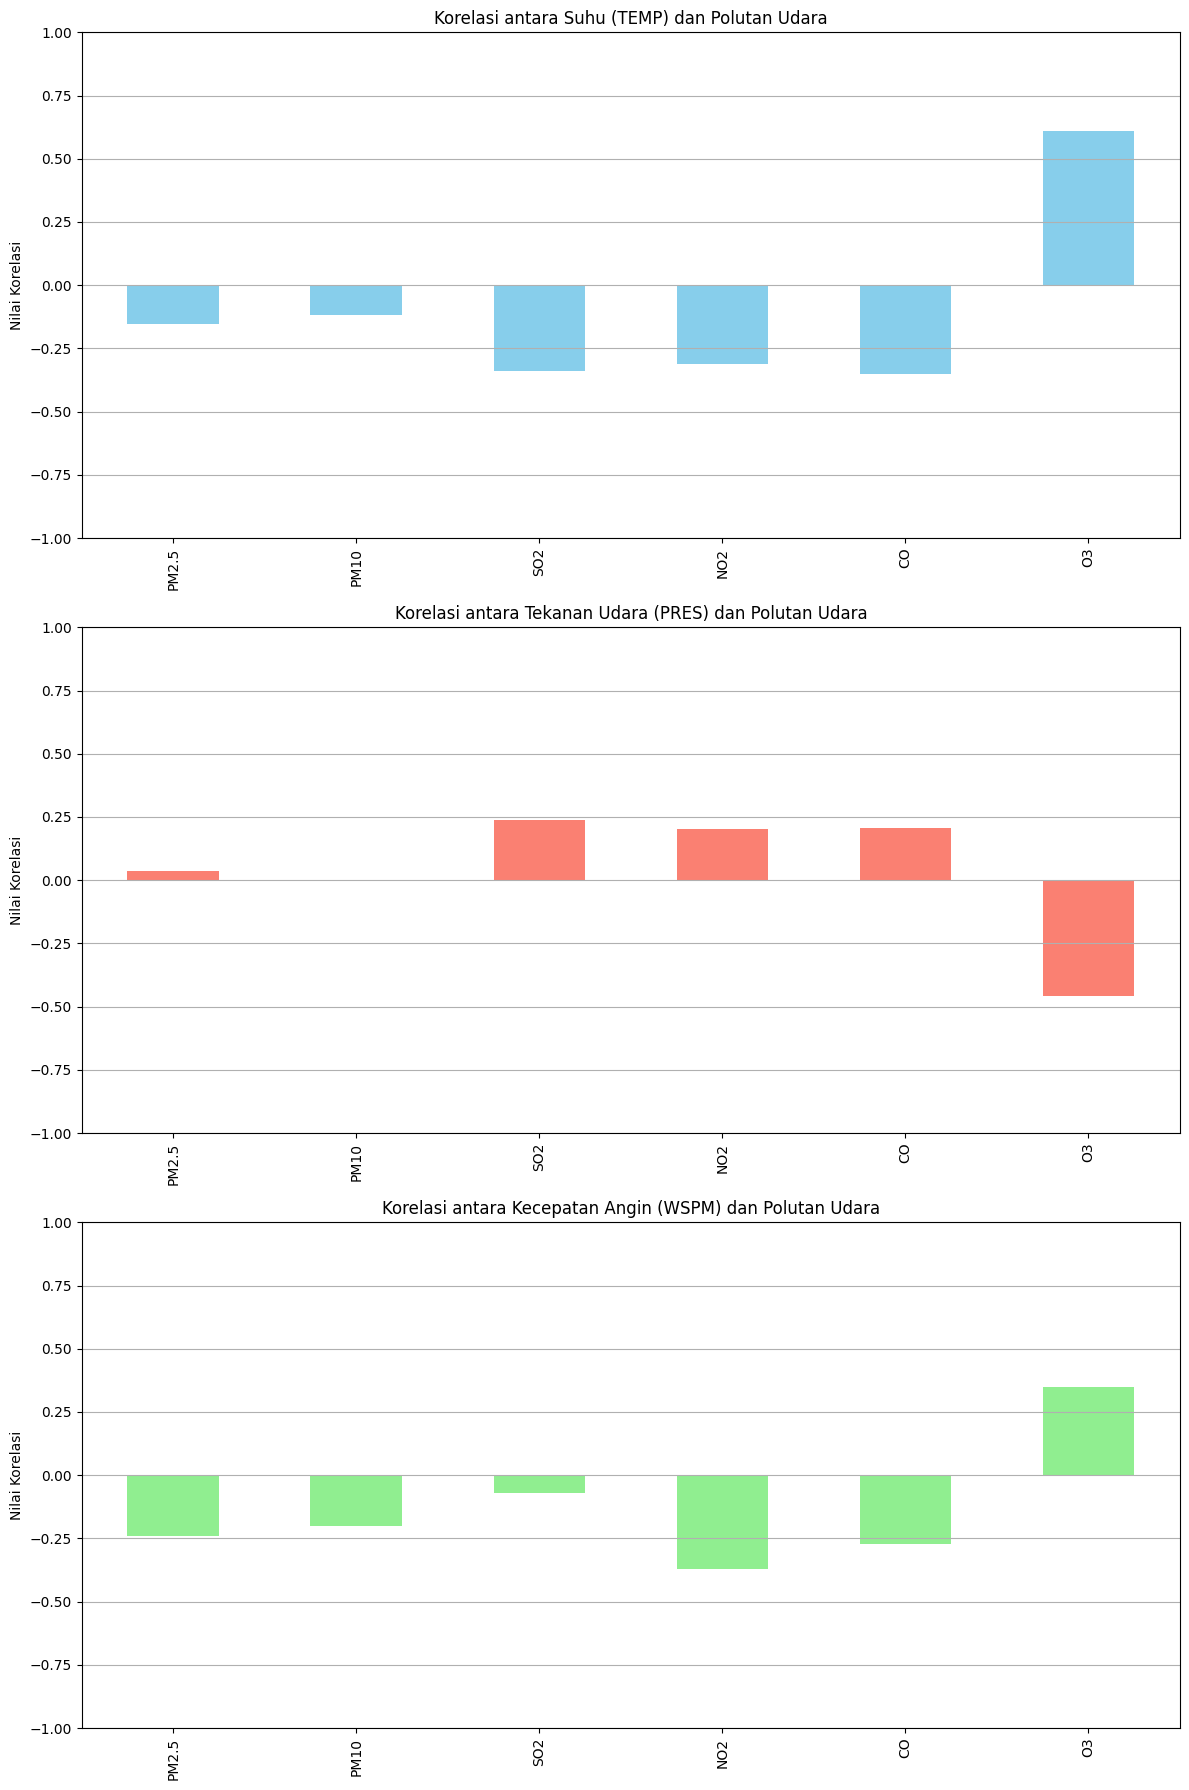

In [227]:
cuaca_cols = ['TEMP', 'PRES', 'WSPM']  # Suhu, Tekanan, Kecepatan angin
polusi_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']  # Polutan udara

# Matriks korelasi antara faktor cuaca dan polusi udara
correlation_matrix = combined_df[cuaca_cols + polusi_cols].corr()

# Mengambil korelasi dari faktor cuaca terhadap polutan udara
correlation_data = correlation_matrix.loc[cuaca_cols, polusi_cols]

# Membuat bar chart terpisah untuk masing-masing faktor cuaca
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Bar chart untuk Suhu (TEMP)
correlation_data.loc['TEMP'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Korelasi antara Suhu (TEMP) dan Polutan Udara")
axes[0].set_ylabel("Nilai Korelasi")
axes[0].set_ylim([-1, 1])
axes[0].grid(axis='y')

# Bar chart untuk Tekanan Udara (PRES)
correlation_data.loc['PRES'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Korelasi antara Tekanan Udara (PRES) dan Polutan Udara")
axes[1].set_ylabel("Nilai Korelasi")
axes[1].set_ylim([-1, 1])
axes[1].grid(axis='y')

# Bar chart untuk Kecepatan Angin (WSPM)
correlation_data.loc['WSPM'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title("Korelasi antara Kecepatan Angin (WSPM) dan Polutan Udara")
axes[2].set_ylabel("Nilai Korelasi")
axes[2].set_ylim([-1, 1])
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah ada pola musiman dalam tingkat polusi udara yang dapat digunakan untuk memprediksi waktu dengan kualitas udara buruk, sehingga dapat diambil langkah pencegahan?

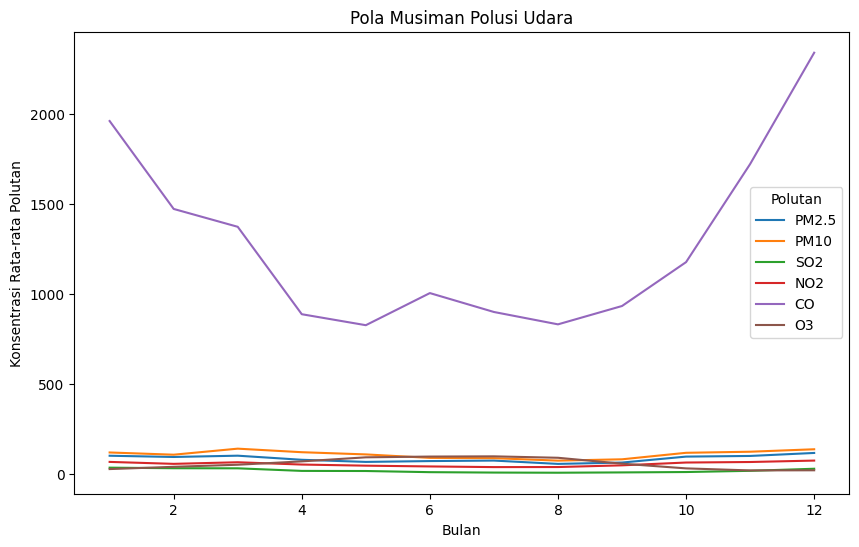

In [228]:
combined_df['month'] = pd.to_datetime(combined_df[['year', 'month', 'day']]).dt.month

# Rata-rata polusi udara berdasarkan bulan
monthly_pollution = combined_df.groupby('month')[polusi_cols].mean()

# Visualisasi pola musiman
monthly_pollution.plot(kind='line', figsize=(10, 6))
plt.title('Pola Musiman Polusi Udara')
plt.ylabel('Konsentrasi Rata-rata Polutan')
plt.xlabel('Bulan')
plt.legend(title='Polutan')
plt.show()

**Insight:**
- Faktor cuaca memiliki pengaruh yang cukup signifikan pada polusi di udara
- Pada bulan 10 sampai dengan 2 terjadi peningkatan tingkat polusi CO

## Conclusion

### Conclusion Pertanyaan 1
Dari hasil visualisasi, faktor cuaca (suhu, tekanan atmosfer, dan kecepatan angin) berpengaruh terhadap tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, O3):

- Pengaruh Suhu (TEMP):
Korelasi Positif dengan O3: Suhu menunjukkan korelasi positif yang cukup signifikan dengan O3. Ini menunjukkan bahwa peningkatan suhu cenderung diikuti dengan peningkatan tingkat ozon
Korelasi Negatif dengan SO2 dan CO: Suhu menunjukkan korelasi negatif dengan SO2 dan CO, meskipun tidak terlalu signifikan. Hal ini dapat menunjukkan bahwa pada suhu yang lebih tinggi, kemungkinan adanya sumber polusi dari bahan bakar fosil atau industri yang menghasilkan SO2 dan CO mungkin berkurang.
-Pengaruh Tekanan Udara (PRES):
Korelasi Negatif dengan Semua Polutan: Tekanan udara memiliki korelasi negatif yang lebih jelas dengan semua polutan yang dianalisis. Hal ini menunjukkan bahwa peningkatan tekanan atmosfer dapat berhubungan dengan penurunan konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3.
-Pengaruh Kecepatan Angin (WSPM):
Korelasi Negatif dengan PM2.5, PM10, dan CO: Kecepatan angin menunjukkan korelasi negatif yang jelas dengan polutan PM2.5, PM10, dan CO. Ini berarti bahwa kecepatan angin yang lebih tinggi dapat membantu disperse atau menyebarkan polutan di atmosfer, mengurangi konsentrasi polutan di suatu daerah.
Korelasi Positif dengan O3: Namun, WSPM menunjukkan korelasi positif dengan O3. Ini bisa terjadi karena kecepatan angin yang lebih tinggi dapat membawa polutan dari daerah lain yang mungkin berkontribusi pada pembentukan O3.

Kesimpulan Umum:
Faktor cuaca seperti suhu, tekanan atmosfer, dan kecepatan angin memiliki dampak yang signifikan terhadap tingkat polusi udara. Peningkatan suhu cenderung meningkatkan kadar O3, sementara tekanan udara dan kecepatan angin berkontribusi dalam mengurangi konsentrasi polutan seperti PM2.5, PM10, dan CO.
Pemahaman tentang hubungan ini sangat penting untuk pengelolaan kualitas udara dan strategi mitigasi polusi, terutama dalam merencanakan tindakan yang diperlukan saat kondisi cuaca tertentu.

### Conclusion Pertanyaan 2
Dari grafik di atas yang menunjukkan pola musiman rata-rata konsentrasi polutan udara berdasarkan bulan, beberapa kesimpulan yang dapat diambil adalah:

- CO (Karbon Monoksida) Menunjukkan Pola Musiman yang Signifikan:
Terlihat bahwa polutan CO (garis ungu) memiliki variasi musiman yang sangat jelas. Konsentrasinya mencapai puncak tertinggi di bulan Januari, menurun hingga titik terendah sekitar bulan Juni, lalu kembali naik secara signifikan pada akhir tahun, khususnya di bulan Desember.
Ini menunjukkan bahwa bulan-bulan awal dan akhir tahun (musim dingin atau musim hujan di beberapa negara) mungkin memiliki kualitas udara yang lebih buruk terkait dengan konsentrasi CO.
-Polutan Lain Tidak Menunjukkan Variasi yang Signifikan:
Untuk polutan lainnya seperti PM2.5, PM10, SO2, NO2, dan O3, tidak ada fluktuasi musiman yang besar terlihat. Konsentrasi rata-rata mereka cenderung relatif stabil sepanjang tahun, dengan sedikit peningkatan di akhir tahun.

Berdasarkan pola ini, dapat diprediksi bahwa waktu-waktu dengan kualitas udara yang buruk terkait dengan CO terjadi pada awal dan akhir tahun, khususnya pada bulan Januari dan Desember.
Ini bisa menjadi indikator bahwa langkah-langkah pencegahan atau pengendalian emisi perlu lebih ditingkatkan pada periode-periode tersebut, terutama untuk polutan CO.

Langkah Pencegahan:

Melihat tren ini, pemerintah atau pihak terkait dapat mempersiapkan strategi mitigasi, seperti membatasi aktivitas industri atau transportasi yang memproduksi CO pada bulan-bulan dengan konsentrasi tinggi, serta meningkatkan kesadaran masyarakat untuk mengurangi emisi kendaraan pada periode tersebut.
Secara keseluruhan, CO adalah polutan yang paling mungkin memberikan indikasi pola musiman yang dapat digunakan untuk memprediksi kualitas udara yang buruk, sementara polutan lainnya menunjukkan variasi yang lebih stabil sepanjang tahun.

In [229]:
# Menyimpan dataframe ke dalam file CSV
combined_df.to_csv('cleaned_data.csv', index=False)